# Automated Extraction of Quotations from Text - Data Preparation

The purpose is to ingest and clean data for model training. The data consists of two classes, namely quotations and normal text. Each class of data is ingested from different sources. The text is cleaned and the resulting data set is stored for model training later.

## Ingest Data

Equal number of quotations and non-quotations are to be ingested. The quotations come from Kaggle data set that have been identified as quotations. The non-quotations come from the Brown corpus in the NLTK library.

In [ ]:
!pip install --quiet googletrans==3.1.0a0 alt-profanity-check

     |████████████████████████████████| 1.9 MB 5.3 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 1.4 MB 42.9 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
     |████████████████████████████████| 65 kB 2.9 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The CLASS_SIZE variable can be set for the number of text data to be ingested for each class (quotations and non-quotations).

In [ ]:
CLASS_SIZE = 40000
RANDOM_STATE = 12

pd.set_option('max_colwidth', 200)

### Ingest Quotations

The text data to be used as quotations are taken from a research by Shivali Goel, Rishi Madhok, and Shweta Garg (2018) at https://github.com/ShivaliGoel/Quotes-500K

The original data set consists of about 500,000 quotations. For the practical purpose of this research, only a subset of the data might be used. The size of the subset can be set using the CLASS_SIZE variable above.

![Sample quotation](https://github.com/ShivaliGoel/Quotes-500K/raw/master/DS_Img.png "Sample quotation")

In [ ]:
source_positive = 'quotes-500k.csv'

df_positive = pd.read_csv(source_positive)\
  .sample(CLASS_SIZE, random_state=RANDOM_STATE)\
  .reset_index(drop=True)

In [ ]:
df_positive

,quote,author,category
0,Enjoy life. There's plenty of time to be dead.,Hans Christian Andersen,"carpe-diem, death, enjoy-life, life, misattributed, time"
1,A fine line exists between quitting on ourselves and letting go of a restrictive position in life and moving forward to reach our ultimate destination based upon our natal predisposition honed by ...,"Kilroy J. Oldster, Dead Toad Scrolls","know-thyself, philosophy-of-life, self-acceptance, self-acceptance-quotes, self-accountability, self-awakening, self-awareness, self-awareness-quotes, self-knowledge, self-knowledge-quotes"
2,"A few nights later, I secretly hope that I might be a genius. Why else can no amount of sleeping pills fell my brain? But in the morning my daughter asks me what a cloud is and I cannot say.","Jenny Offill, Dept. of Speculation","brain, clouds, genius, knowledge, sleep, sleeping, sleepless, sleeplessness"
3,A true revolution of values will soon cause us to question the fairness and justice of many of our past and present policies. On the one hand we are called to play the good Samaritan on life’s roa...,Martin Luther King Jr.,"antiwar, colonialism, justice, pacifism, peace, vietnam, war"
4,To enjoy a peaceful & Beautiful Life We should open our 'EYE' and Close our 'I,"Abhysheq Shukla, KISS Life ""Life is what you make it""","age, aim, anger, belief, business, change, confidence, courage, creativity, death, desire, dreams, education, failure, faith, family, fear, forgiveness, goal, god, happiness, hate, heart, history,..."
...,...,...,...
39995,It is never safe to look into the future with eyes of fear.,E. H. Harriman,future
39996,"Collaboration is just, really, a group of people getting in a room with their eye on a very similar prize and wanting to come out with the same show. The director, ultimately, is the guy in front ...",Harold Prince,"Courage, Collaboration, Eye"
39997,"Maybe we all have a dark place inside of us, a place where dark thoughts and darker dreams live, but it doesn't have to become who we are.","Mary E. Pearson, The Fox Inheritance","darkness, personality"
39998,Creativity sparks originality which then manifests itself into what we call evolution. To depreciate imagination is to depreciate life.,Al Stone,"development, evolution, philosophy, thought"


In [ ]:
df_positive = df_positive.rename(columns={'quote': 'text'})\
  .drop(['author', 'category'], axis=1)

df_positive['quote'] = 1
df_positive

,text,quote
0,Enjoy life. There's plenty of time to be dead.,1
1,A fine line exists between quitting on ourselves and letting go of a restrictive position in life and moving forward to reach our ultimate destination based upon our natal predisposition honed by ...,1
2,"A few nights later, I secretly hope that I might be a genius. Why else can no amount of sleeping pills fell my brain? But in the morning my daughter asks me what a cloud is and I cannot say.",1
3,A true revolution of values will soon cause us to question the fairness and justice of many of our past and present policies. On the one hand we are called to play the good Samaritan on life’s roa...,1
4,To enjoy a peaceful & Beautiful Life We should open our 'EYE' and Close our 'I,1
...,...,...
39995,It is never safe to look into the future with eyes of fear.,1
39996,"Collaboration is just, really, a group of people getting in a room with their eye on a very similar prize and wanting to come out with the same show. The director, ultimately, is the guy in front ...",1
39997,"Maybe we all have a dark place inside of us, a place where dark thoughts and darker dreams live, but it doesn't have to become who we are.",1
39998,Creativity sparks originality which then manifests itself into what we call evolution. To depreciate imagination is to depreciate life.,1


In [ ]:
df_positive.head(10)

,text,quote
0,Enjoy life. There's plenty of time to be dead.,1
1,A fine line exists between quitting on ourselves and letting go of a restrictive position in life and moving forward to reach our ultimate destination based upon our natal predisposition honed by ...,1
2,"A few nights later, I secretly hope that I might be a genius. Why else can no amount of sleeping pills fell my brain? But in the morning my daughter asks me what a cloud is and I cannot say.",1
3,A true revolution of values will soon cause us to question the fairness and justice of many of our past and present policies. On the one hand we are called to play the good Samaritan on life’s roa...,1
4,To enjoy a peaceful & Beautiful Life We should open our 'EYE' and Close our 'I,1
5,"Instead of living our lives fighting discontentment, striving to gain contentment from things that were never meant to bring contentment… What if we gave it all up for a grand adventure, for a wor...",1
6,Other married people have lived together and hated each other. Why shouldn't we? We may forget even to hate.,1
7,When sighs are hypnotized by sorrowHappy moments you need to borrowFrom a little child or from a birdWho has the wild freedom of soul: stirred!,1
8,"A person who has not done one half his day's work by ten o'clock, runs a chance of leaving the other half undone.",1
9,"At the sensory level I am the divine receiving station...a two-legged, trembling-tissue, Jodrell Bank radar telescope, dancing, grumbling, sniffling Geiger counter""""But there's an added feature. E...",1


### Ingest Non-Quotations

The text data to be used as non-quotations are taken from the Brown corpus in the NLTK library. The corpus consists of more than 50,000 sentences ranging from news to fiction deemed not to be quotations.

In [ ]:
!pip install nltk==3.2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 5.2 MB/s 
  Created wheel for nltk: filename=nltk-3.2.5-py3-none-any.whl size=1392158 sha256=a90a184abeb302155b6da0ba3efea6a9e93d73554dc1a3649e0b1d7c55b12876
  Stored in directory: /root/.cache/pip/wheels/60/de/57/6bced01d340818a36413222e6efcc7766d1f1e4575782b6223
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [ ]:
import nltk
from nltk.corpus import brown

In [ ]:
nltk.download('brown')
nltk.download('punkt')
nltk.download('perluniprops')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Unzipping misc/perluniprops.zip.


True

Shown the categories in the Brown corpus.

In [ ]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

Extract sentences from the Brown corpus.

In [ ]:
# !pip install mosestokenizer

In [ ]:
from nltk.tokenize.moses import MosesDetokenizer
# from mosestokenizer import *

In [ ]:
mdetok = MosesDetokenizer()
brown_sentences = [mdetok.detokenize(' '.join(sent).replace('``', '"').replace("''", '"').replace('`', "'").split(), return_str=True)  for sent in brown.sents()]

With the sentences extracted, create examples of text consisting of 1, 2 or 3 sentences each. The proportion is 60% for one-sentence text, 30% for two-sentence text, and 10% for three-sentence text. This proportion approximates that of the quotations extracted earlier.

In [ ]:
import random

In [ ]:
SENTENCES_ONE = 0.6
SENTENCES_TWO = 0.9

In [ ]:
negative_sentences = []

for i in range(CLASS_SIZE):
  chance = random.random()

  if chance < SENTENCES_ONE:
    num_sentences = 1
  elif chance < SENTENCES_TWO:
    num_sentences = 2
  else:
    num_sentences = 3

  random_sentence_id = random.randint(-3, len(brown_sentences)-3)
  random_sentence = ' '.join(brown_sentences[random_sentence_id:random_sentence_id+num_sentences])
  negative_sentences.append(random_sentence)

len(negative_sentences)

40000

In [ ]:
negative_sentences[:5]

['Mission to Viet Nam Gen. Maxwell Taylor\'s statement in Saigon that he is "very much encouraged" about the chances of the pro-Western government of Viet Nam turning back Communist guerrilla attacks comes close to an announcement that he will not recommend dispatching United States troops to bolster the Vietnamese Army. Gen. Taylor will report to President Kennedy in a few days on the results of his visit to South Viet Nam and, judging from some of his remarks to reporters in the Far East, he is likely to urge a more efficient mobilization of Vietnamese military, economic, political and other resources.',
 'As heretofore, our Fellowships are available to assist research in all fields of knowledge and creative effort in all the arts.',
 'she, too, prayed only to God.',
 'Because of its importance, and because the lack of price competition is well recognized, the industry is under considerable public pressure not to raise its price any more than could be justified by cost increases.',
 

In [ ]:
df_negative = pd.DataFrame(
    {
     'text': negative_sentences,
      'quote': 0
    }
)

df_negative

,text,quote
0,"Mission to Viet Nam Gen. Maxwell Taylor's statement in Saigon that he is ""very much encouraged"" about the chances of the pro-Western government of Viet Nam turning back Communist guerrilla attacks...",0
1,"As heretofore, our Fellowships are available to assist research in all fields of knowledge and creative effort in all the arts.",0
2,"she, too, prayed only to God.",0
3,"Because of its importance, and because the lack of price competition is well recognized, the industry is under considerable public pressure not to raise its price any more than could be justified ...",0
4,"Her hair was the color of those blooms which in seed catalogues are referred to as ""black"", but since no flower is actually without color contain always a hint of grape or purple or blue -- he wan...",0
...,...,...
39995,"These carts were of a type devised in Pembina in the days of Alexander Henry the Younger about a decade before the Selkirk colony was begun. In 1802 Henry referred to ""our new carts"" as being abou...",0
39996,"When we were fighting, a few of our orthodox people were lying down in the roads so we could not pass. They said that we must not fight but wait for the Messiah "".",0
39997,"On my way out I told her, ""If you should eh just happen to see your husband, get him to give himself up.",0
39998,Necessary retouching was put on at once.,0


### Combining Data Set

Equal number of quotations and non-quotations have been created and is now combined into one data set.

In [ ]:
df = pd.concat([df_positive, df_negative])\
  .reset_index(drop=True)
df

,text,quote
0,Enjoy life. There's plenty of time to be dead.,1
1,A fine line exists between quitting on ourselves and letting go of a restrictive position in life and moving forward to reach our ultimate destination based upon our natal predisposition honed by ...,1
2,"A few nights later, I secretly hope that I might be a genius. Why else can no amount of sleeping pills fell my brain? But in the morning my daughter asks me what a cloud is and I cannot say.",1
3,A true revolution of values will soon cause us to question the fairness and justice of many of our past and present policies. On the one hand we are called to play the good Samaritan on life’s roa...,1
4,To enjoy a peaceful & Beautiful Life We should open our 'EYE' and Close our 'I,1
...,...,...
79995,"These carts were of a type devised in Pembina in the days of Alexander Henry the Younger about a decade before the Selkirk colony was begun. In 1802 Henry referred to ""our new carts"" as being abou...",0
79996,"When we were fighting, a few of our orthodox people were lying down in the roads so we could not pass. They said that we must not fight but wait for the Messiah "".",0
79997,"On my way out I told her, ""If you should eh just happen to see your husband, get him to give himself up.",0
79998,Necessary retouching was put on at once.,0


In [ ]:
df['quote'].value_counts()

1    40000
0    40000
Name: quote, dtype: int64

In [ ]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
text,80000,73931,3.,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quote,80000.0,NaN,NaN,NaN,0.5,0.500003,0.0,0.0,0.5,1.0,1.0


## Clean Data

The extracted quotations and non-quotations are to be cleaned. The cleaning process includes removing duplicate text, long text, text with many sentences, non-English text, and text with high profanity score.

A function to plot histogram.

In [ ]:
def PlotHist(column):
  df.loc[df['quote'] == 1, column].hist(color='r', alpha=0.5, label=1)
  df.loc[df['quote'] == 0, column].hist(color='b', alpha=0.5, label=0)
  plt.legend()

### Duplicate Text

Remove duplicate text data.

In [ ]:
df[df.duplicated('text')]

,text,quote
353,Never reach out your hand unless you're willing to extend an arm.,1
3803,If you talk to God you are praying if God talks to you you have schizophrenia.,1
5468,I am not the smartest or most talented person in the world but I succeeded because I keep going and going and going.,1
6107,Failure is a school in which the truth always grows strong.,1
8518,A man should be taller older heavier uglier and hoarser than his wife.,1
...,...,...
79978,"While population at Fort Garry increased rapidly, from 2,417 in 1831 to 4,369 in 1840, economic opportunities did not increase at a similar rate. Accordingly, though the practice violated the no-t...",0
79988,A beginner's shotgun has also been introduced this year.,0
79990,"We first see him shaking Mrs. Joe's hand on discovering the sizable amount of the premium paid to her husband for Pip's indenture as an apprentice and later pumping Pip's hands ""for the hundredth ...",0
79997,"On my way out I told her, ""If you should eh just happen to see your husband, get him to give himself up.",0


In [ ]:
df.drop_duplicates('text', inplace=True)

In [ ]:
df['quote'].value_counts()

1    39904
0    34027
Name: quote, dtype: int64

### Replace Characters

Change curly quotation marks into straight quotation marks and remove brackets in text.

In [ ]:
df['text'] = df['text'].str.replace(u'\u2018', '\'', regex=False)
df['text'] = df['text'].str.replace(u'\u2019', '\'', regex=False)
df['text'] = df['text'].str.replace(u'\u201c', '"', regex=False)
df['text'] = df['text'].str.replace(u'\u201d', '"', regex=False)

In [ ]:
df['text'] = df['text'].str.replace('[', '"', regex=False)
df['text'] = df['text'].str.replace(']', '"', regex=False)

In [ ]:
df['quote'].value_counts()

1    39904
0    34027
Name: quote, dtype: int64

### Lower-Case

Create a column of lower-case text for data exploration.

In [ ]:
df['lower'] = df['text'].str.lower()
df.sample(5)

,text,quote,lower
75250,"The working test of ""the facts"" must always be the best available description obtainable from scholars and scientists who have applied their methods of investigation to relevant situations. Grante...",0,"the working test of ""the facts"" must always be the best available description obtainable from scholars and scientists who have applied their methods of investigation to relevant situations. grante..."
56853,"""We ourselves must stand sentinel"".",0,"""we ourselves must stand sentinel""."
67545,"She was on the junk, and they slide fast when that happens.",0,"she was on the junk, and they slide fast when that happens."
13219,A tree fears an axe even though its handle is made from it.,1,a tree fears an axe even though its handle is made from it.
20144,"If you follow your heart, you will be happy.",1,"if you follow your heart, you will be happy."


In [ ]:
df['quote'].value_counts()

1    39904
0    34027
Name: quote, dtype: int64

### Punctuation Marks

Remove text with excessive punctuation marks. Keep only text with 10 or less punctuation marks.

In [ ]:
import string

In [ ]:
MAX_PUNCTUATION = 10

In [ ]:
df['punctuation'] = df['text'].map(lambda x: len([char for char in x if char in string.punctuation]))
df.sample(5)

,text,quote,lower,punctuation
52542,He has felt terrible about all this.,0,he has felt terrible about all this.,1
8560,Daily life is always extraordinary when rendered precisely. We can unlock our lives with a pencil tip.,1,daily life is always extraordinary when rendered precisely. we can unlock our lives with a pencil tip.,2
65696,The reason that we are not going ahead full speed to develop high thrust-to-weight engines is that it would cost perhaps a billion dollars -- and you don't spend that sort of money if aircraft are...,0,the reason that we are not going ahead full speed to develop high thrust-to-weight engines is that it would cost perhaps a billion dollars -- and you don't spend that sort of money if aircraft are...,8
15668,Somehow the thought she might be next wasn't nearly as terrifying as the realization he was gone.,1,somehow the thought she might be next wasn't nearly as terrifying as the realization he was gone.,2
45469,"As a prominent industrialist, you ought to be interested in his nibs' support group. Isn't his racket down your alley ""?? Once it was, William thought.",0,"as a prominent industrialist, you ought to be interested in his nibs' support group. isn't his racket down your alley ""?? once it was, william thought.",9


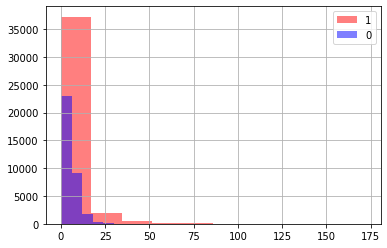

In [ ]:
PlotHist('punctuation')

In [ ]:
df[df['punctuation'] > MAX_PUNCTUATION][['text', 'punctuation']].sample(5)

,text,punctuation
34789,"As she drove the familiar route to the school, she considered her magnificent new age. Forty. She could still feel ""forty"" the way it felt when she was fifteen. Such a colorless age. Marooned in t...",12
624,"Good writers don't moralize, nor do they preach, but they do create longing for the true and the beautiful, and that is why you must write with Christ at the center of your reason for writing. Tha...",12
32719,"I need a new friend. I need a friend, period. Not a true friend, nothing close or share clothes or sleepover giggle giggle yak yak. Just a pseudo-friend, disposable friend. Friend as accessory. Ju...",11
6423,"Instead I just stand there, tears running down my cheeks in nameless emotion that tastes of joy and of grief. Joy for the being of the shimmering world and grief for what we have lost. The grasses...",17
7072,"I'm not a person who naturally loves to wake up in the morning and go 'Yeah, I'm going to work out for five hours - wooh!' Like, that's not my thing. I'm from Texas. I like to eat carbs. I like to...",16


In [ ]:
df = df[df['punctuation'] <= MAX_PUNCTUATION]
df.sample(5)

,text,quote,lower,punctuation
9506,Class is more than money. Class is also about knowledge.,1,class is more than money. class is also about knowledge.,2
5833,"I've been burdened with blame trapped in the past for too long, I'm moving on",1,"i've been burdened with blame trapped in the past for too long, i'm moving on",3
30434,"Mathematics education is much more complicated than you expected, even though you expected it to be more complicated than you expected.",1,"mathematics education is much more complicated than you expected, even though you expected it to be more complicated than you expected.",2
12594,They may think I'm insane because I left my wonderful job. I may think they are insane because they don't know the value of life.,1,they may think i'm insane because i left my wonderful job. i may think they are insane because they don't know the value of life.,4
4671,Woman you're as mean as a copperhead. Come here let's find out if you're as cold-blooded.,1,woman you're as mean as a copperhead. come here let's find out if you're as cold-blooded.,6


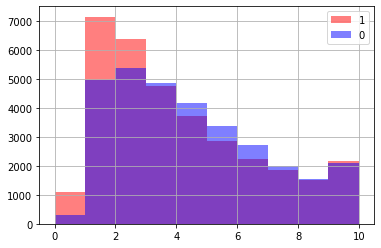

In [ ]:
PlotHist('punctuation')

In [ ]:
df['quote'].value_counts()

1    33626
0    31348
Name: quote, dtype: int64

### Text Length

Keep only text data of 280 characters and below, which is the size of a tweet.

In [ ]:
MAX_LENGTH = 280

In [ ]:
df['num_chars'] = df['text'].str.len()
df.sample(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,quote,lower,punctuation,num_chars
50743,"No, the fish could eat their bodies for all the Sturch cared. Hal felt sorry for Mary;;",0,"no, the fish could eat their bodies for all the sturch cared. hal felt sorry for mary;;",4,87
31674,"Treat people as an end, and never as a means to an end",1,"treat people as an end, and never as a means to an end",1,54
29760,You can't be yourself within jealousy.,1,you can't be yourself within jealousy.,2,38
72653,"And, therefore, being in disgrace, they would not be cremated and their ashes flung to the winds in public ceremony.",0,"and, therefore, being in disgrace, they would not be cremated and their ashes flung to the winds in public ceremony.",4,116
8036,"I set goals…I take chances…I dare to achieve…I win…I lose…I don't quit…It's my life and I'm not afraid to LIVE it!I would rather experience the ups and downs of a life I have chosen, than to suffe...",1,"i set goals…i take chances…i dare to achieve…i win…i lose…i don't quit…it's my life and i'm not afraid to live it!i would rather experience the ups and downs of a life i have chosen, than to suffe...",6,238


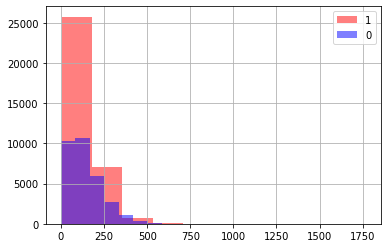

In [ ]:
PlotHist('num_chars')

In [ ]:
df[df['num_chars'] > MAX_LENGTH].sample(5)

,text,quote,lower,punctuation,num_chars
5807,"It's not like I want to get discovered, exactly, the way you hear actresses getting picked off at diners. It's more about my own road to discovery like pecking my way out of a shell. I just want t...",1,"it's not like i want to get discovered, exactly, the way you hear actresses getting picked off at diners. it's more about my own road to discovery like pecking my way out of a shell. i just want t...",10,288
68793,"Though the makeshift airports were ready, the York State Guard flyers proved unable to keep any kind of mail schedule. They had courage but their meager training consisted of weekend hops in good ...",0,"though the makeshift airports were ready, the york state guard flyers proved unable to keep any kind of mail schedule. they had courage but their meager training consisted of weekend hops in good ...",8,516
20853,I want people to know that I am a real person who exists in a real world. I am not a raped girl or victim. I had a life before that evening and I will continue to have a life. What happened with m...,1,i want people to know that i am a real person who exists in a real world. i am not a raped girl or victim. i had a life before that evening and i will continue to have a life. what happened with m...,6,297
68594,"This has been his first encounter with mankind, and, although he has now become a legendary figure in the popular European press, it leaves him profoundly dissatisfied. Despite Berger's report, En...",0,"this has been his first encounter with mankind, and, although he has now become a legendary figure in the popular european press, it leaves him profoundly dissatisfied. despite berger's report, en...",9,372
76464,"( He'd get the engine oil flowing with an electric heater under a big canvas cover. ) Wishing to show that aviation was dependable and here to stay, Bob Fogg always made a point of taking off each...",0,"( he'd get the engine oil flowing with an electric heater under a big canvas cover. ) wishing to show that aviation was dependable and here to stay, bob fogg always made a point of taking off each...",8,285


In [ ]:
df[df['num_chars'] < 20].sample(5)

,text,quote,lower,punctuation,num_chars
51479,Sees Jones ahead,0,sees jones ahead,0,16
45019,Why not??,0,why not??,2,9
60554,Haney scowled.,0,haney scowled.,1,14
48765,Example 1.,0,example 1.,1,10
41482,The two are as one.,0,the two are as one.,1,19


In [ ]:
df = df[df['num_chars'] <= MAX_LENGTH]
df.sample(5)

,text,quote,lower,punctuation,num_chars
68592,The union does not regard unemployment of its own members as a matter of concern when setting its own wage policy -- its concern with employment makes itself felt in pressure upon the government t...,0,the union does not regard unemployment of its own members as a matter of concern when setting its own wage policy -- its concern with employment makes itself felt in pressure upon the government t...,3,223
60909,"Eight or ten years ago, a couple of French hoods stole a priceless Khmer head from the Musee Guimet, in Paris, and a week later crawled into the Salpetriere with unmistakable symptoms of leprosy.",0,"eight or ten years ago, a couple of french hoods stole a priceless khmer head from the musee guimet, in paris, and a week later crawled into the salpetriere with unmistakable symptoms of leprosy.",4,195
22900,There are fascinating possibilities in this situation. I'd get it down on paper if I were you.,1,there are fascinating possibilities in this situation. i'd get it down on paper if i were you.,3,94
49028,"Robinson told Policemen James Jones and Morgan Lloyd of the Wabash Avenue district that 10 youths boarded his south bound express bus in front of Dunbar Vocational High School, 30th Street and Sou...",0,"robinson told policemen james jones and morgan lloyd of the wabash avenue district that 10 youths boarded his south bound express bus in front of dunbar vocational high school, 30th street and sou...",5,232
21375,The families of many athletes - incensed at the sports leagues and hoping to make games safer overall - are increasingly making the brains of players who die prematurely and suspiciously available...,1,the families of many athletes - incensed at the sports leagues and hoping to make games safer overall - are increasingly making the brains of players who die prematurely and suspiciously available...,4,261


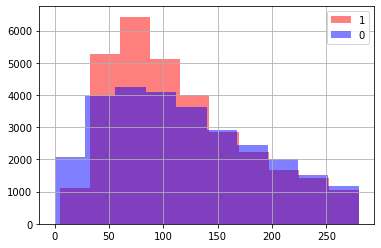

In [ ]:
PlotHist('num_chars')

In [ ]:
df['quote'].value_counts()

1    31135
0    28125
Name: quote, dtype: int64

### Words

Create a column for the words in the text and a column for the number of words for data exploration.

In [ ]:
df['words'] = df['lower'].str.split()
df.sample(5)

,text,quote,lower,punctuation,num_chars,words
14362,"Human beings do not eat nutrients, they eat food.",1,"human beings do not eat nutrients, they eat food.",2,49,"[human, beings, do, not, eat, nutrients,, they, eat, food.]"
10844,I want all my senses engaged. Let me absorb the world's variety and uniqueness.,1,i want all my senses engaged. let me absorb the world's variety and uniqueness.,3,79,"[i, want, all, my, senses, engaged., let, me, absorb, the, world's, variety, and, uniqueness.]"
24482,You cannot be a modern association without a contemporary board.,1,you cannot be a modern association without a contemporary board.,1,64,"[you, cannot, be, a, modern, association, without, a, contemporary, board.]"
79293,Alexander walked away.,0,alexander walked away.,1,22,"[alexander, walked, away.]"
76242,"With eyes focused on the third congressional district, the historic Delta district, and Congressman Frank E. Smith as the one most likely to go, the redistricting battle will put to a test the lon...",0,"with eyes focused on the third congressional district, the historic delta district, and congressman frank e. smith as the one most likely to go, the redistricting battle will put to a test the lon...",5,272,"[with, eyes, focused, on, the, third, congressional, district,, the, historic, delta, district,, and, congressman, frank, e., smith, as, the, one, most, likely, to, go,, the, redistricting, battle..."


In [ ]:
df['num_words'] = df['words'].map(lambda x: len(x))
df.sample(5)

,text,quote,lower,punctuation,num_chars,words,num_words
43532,"""Can't say yet.",0,"""can't say yet.",3,15,"[""can't, say, yet.]",3
2486,"Because I'm selfish. I'm a coward. I'm the kind of girl who, when she might actually be of use, would run to stay alive and leave those who couldn't follow to suffer and die.",1,"because i'm selfish. i'm a coward. i'm the kind of girl who, when she might actually be of use, would run to stay alive and leave those who couldn't follow to suffer and die.",9,174,"[because, i'm, selfish., i'm, a, coward., i'm, the, kind, of, girl, who,, when, she, might, actually, be, of, use,, would, run, to, stay, alive, and, leave, those, who, couldn't, follow, to, suffe...",34
76834,"Rudolf Kempe conducts. No casts are listed, but Lotte Lehmann sent word that the Negro soprano, Grace Bumbry, will sing Venus in ""Tannhaeuser"".",0,"rudolf kempe conducts. no casts are listed, but lotte lehmann sent word that the negro soprano, grace bumbry, will sing venus in ""tannhaeuser"".",7,143,"[rudolf, kempe, conducts., no, casts, are, listed,, but, lotte, lehmann, sent, word, that, the, negro, soprano,, grace, bumbry,, will, sing, venus, in, ""tannhaeuser"".]",23
58540,"""I tell you, you want to leave it that way, I don't fool around with it. I go over to Castro and get fixed up there.",0,"""i tell you, you want to leave it that way, i don't fool around with it. i go over to castro and get fixed up there.",6,116,"[""i, tell, you,, you, want, to, leave, it, that, way,, i, don't, fool, around, with, it., i, go, over, to, castro, and, get, fixed, up, there.]",26
33696,I used to be snow-white . . . but I drifted.,1,i used to be snow-white . . . but i drifted.,5,44,"[i, used, to, be, snow-white, ., ., ., but, i, drifted.]",11


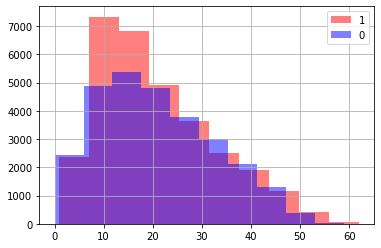

In [ ]:
PlotHist('num_words')

In [ ]:
df[df['num_words'] > 50].sample(5)

,text,quote,lower,punctuation,num_chars,words,num_words
73082,"Civil Defense has far to go and many problems to solve, but is it not in the best spirit of our pioneer tradition to be not only willing, but prepared to care for our own families and help our nei...",0,"civil defense has far to go and many problems to solve, but is it not in the best spirit of our pioneer tradition to be not only willing, but prepared to care for our own families and help our nei...",8,277,"[civil, defense, has, far, to, go, and, many, problems, to, solve,, but, is, it, not, in, the, best, spirit, of, our, pioneer, tradition, to, be, not, only, willing,, but, prepared, to, care, for,...",53
28695,"The Sikh gave him the money. When Menon asked for his address so that he could repay the man, the Sikh said that Menon owed the debt to any stranger who came to him in need, as long as he lived. T...",1,"the sikh gave him the money. when menon asked for his address so that he could repay the man, the sikh said that menon owed the debt to any stranger who came to him in need, as long as he lived. t...",5,260,"[the, sikh, gave, him, the, money., when, menon, asked, for, his, address, so, that, he, could, repay, the, man,, the, sikh, said, that, menon, owed, the, debt, to, any, stranger, who, came, to, h...",55
2364,"Jesus is the Commander of two armies. One is an army of angels in heaven and one is the army of prayer warriors on earth. As Commander of these armies, He shows us how to take back from the enemy ...",1,"jesus is the commander of two armies. one is an army of angels in heaven and one is the army of prayer warriors on earth. as commander of these armies, he shows us how to take back from the enemy ...",5,279,"[jesus, is, the, commander, of, two, armies., one, is, an, army, of, angels, in, heaven, and, one, is, the, army, of, prayer, warriors, on, earth., as, commander, of, these, armies,, he, shows, us...",56
32075,"Beginning a novel is always hard. It feels like going nowhere. I always have to write at least 100 pages that go into the trashcan before it finally begins to work. It's discouraging, but necessar...",1,"beginning a novel is always hard. it feels like going nowhere. i always have to write at least 100 pages that go into the trashcan before it finally begins to work. it's discouraging, but necessar...",8,275,"[beginning, a, novel, is, always, hard., it, feels, like, going, nowhere., i, always, have, to, write, at, least, 100, pages, that, go, into, the, trashcan, before, it, finally, begins, to, work.,...",51
864,I was writing my Ph.D. in the late 1980s and was keeping an eye on what was happening in the world. It became obvious to me that Russia couldn't live without computers. I think I worked this out a...,1,i was writing my ph.d. in the late 1980s and was keeping an eye on what was happening in the world. it became obvious to me that russia couldn't live without computers. i think i worked this out a...,7,278,"[i, was, writing, my, ph.d., in, the, late, 1980s, and, was, keeping, an, eye, on, what, was, happening, in, the, world., it, became, obvious, to, me, that, russia, couldn't, live, without, comput...",53


In [ ]:
df['quote'].value_counts()

1    31135
0    28125
Name: quote, dtype: int64

### Sentences

Keep text with only 1 sentence.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# MAX_SENTENCES = 3
MAX_SENTENCES = 1

In [ ]:
df['num_sentences'] = df.loc[:, 'text'].map(lambda x: len(sent_tokenize(x)))
df.sample(5)

,text,quote,lower,punctuation,num_chars,words,num_words,num_sentences
62320,"This test method is intended for determining the dimensional changes of woven or knitted fabrics, made of fibers other than wool, to be expected when the cloth is subjected to laundering procedure...",0,"this test method is intended for determining the dimensional changes of woven or knitted fabrics, made of fibers other than wool, to be expected when the cloth is subjected to laundering procedure...",3,251,"[this, test, method, is, intended, for, determining, the, dimensional, changes, of, woven, or, knitted, fabrics,, made, of, fibers, other, than, wool,, to, be, expected, when, the, cloth, is, subj...",41,1
2395,"Learn from your past and be better because of your past, but don't cry about your past. Life is full of pain. Let the pain sharpen you, but don't hold on to it. Don't be bitter.",1,"learn from your past and be better because of your past, but don't cry about your past. life is full of pain. let the pain sharpen you, but don't hold on to it. don't be bitter.",9,177,"[learn, from, your, past, and, be, better, because, of, your, past,, but, don't, cry, about, your, past., life, is, full, of, pain., let, the, pain, sharpen, you,, but, don't, hold, on, to, it., d...",36,4
46267,"Our last joint venture, Sainted Lady, a deeply religious film based on the life of Mother Cabrini, and timed so that its release date would coincide with the beatification of America's first saint...",0,"our last joint venture, sainted lady, a deeply religious film based on the life of mother cabrini, and timed so that its release date would coincide with the beatification of america's first saint...",7,250,"[our, last, joint, venture,, sainted, lady,, a, deeply, religious, film, based, on, the, life, of, mother, cabrini,, and, timed, so, that, its, release, date, would, coincide, with, the, beatifica...",43,1
75813,The language and notation introduced are standard throughout the chapter.,0,the language and notation introduced are standard throughout the chapter.,1,73,"[the, language, and, notation, introduced, are, standard, throughout, the, chapter.]",10,1
7188,"Once in a while our school has half days, and the teachers spend the afternoon 'in service,' which I think must be a group therapy for having to deal with us.",1,"once in a while our school has half days, and the teachers spend the afternoon 'in service,' which i think must be a group therapy for having to deal with us.",5,158,"[once, in, a, while, our, school, has, half, days,, and, the, teachers, spend, the, afternoon, 'in, service,', which, i, think, must, be, a, group, therapy, for, having, to, deal, with, us.]",31,1


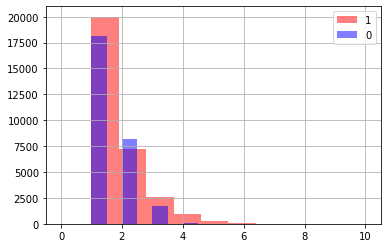

In [ ]:
PlotHist('num_sentences')

In [ ]:
df[df['num_sentences'] > MAX_SENTENCES].sample(5)

,text,quote,lower,punctuation,num_chars,words,num_words,num_sentences
34714,Secret 7591.42.21. Avoiding weasel words in your intelligence analysis isn't easy when your intelligence analysis is about weasels.,1,secret 7591.42.21. avoiding weasel words in your intelligence analysis isn't easy when your intelligence analysis is about weasels.,5,131,"[secret, 7591.42.21., avoiding, weasel, words, in, your, intelligence, analysis, isn't, easy, when, your, intelligence, analysis, is, about, weasels.]",18,2
36923,"This universe was created for joy and happiness. You are born to be happy. Your happiness ultimately makes this universe joyful. Blooming flowers, singing birds, and smiling people fill this unive...",1,"this universe was created for joy and happiness. you are born to be happy. your happiness ultimately makes this universe joyful. blooming flowers, singing birds, and smiling people fill this unive...",6,209,"[this, universe, was, created, for, joy, and, happiness., you, are, born, to, be, happy., your, happiness, ultimately, makes, this, universe, joyful., blooming, flowers,, singing, birds,, and, smi...",33,4
65265,"Most beakers are graduated in cubic centimeters ( cc.), making it necessary to convert the result to cubic inches. However, the displacement of the cylinder can be converted to cubic centimeters.",0,"most beakers are graduated in cubic centimeters ( cc.), making it necessary to convert the result to cubic inches. however, the displacement of the cylinder can be converted to cubic centimeters.",7,195,"[most, beakers, are, graduated, in, cubic, centimeters, (, cc.),, making, it, necessary, to, convert, the, result, to, cubic, inches., however,, the, displacement, of, the, cylinder, can, be, conv...",31,3
11569,"I have attempted for years to make fun of Post Traumatic Stress Disorder, which is a dangerous game. It's similar to poking fun at the largest, scariest bully at your school and assuming you won't...",1,"i have attempted for years to make fun of post traumatic stress disorder, which is a dangerous game. it's similar to poking fun at the largest, scariest bully at your school and assuming you won't...",6,209,"[i, have, attempted, for, years, to, make, fun, of, post, traumatic, stress, disorder,, which, is, a, dangerous, game., it's, similar, to, poking, fun, at, the, largest,, scariest, bully, at, your...",38,2
51926,The hounds of hell search out their quarry in Apollo's sanctuary as they do in the tent of Richard 3. Oedipus and Lear attain similar insights by virtue of similar blindness.,0,the hounds of hell search out their quarry in apollo's sanctuary as they do in the tent of richard 3. oedipus and lear attain similar insights by virtue of similar blindness.,3,174,"[the, hounds, of, hell, search, out, their, quarry, in, apollo's, sanctuary, as, they, do, in, the, tent, of, richard, 3., oedipus, and, lear, attain, similar, insights, by, virtue, of, similar, b...",31,2


In [ ]:
df[df['num_sentences'] == MAX_SENTENCES].sample(5)

,text,quote,lower,punctuation,num_chars,words,num_words,num_sentences
53753,"to the SAC command and control post, forty-five feet below the ground at Offutt Air Force Base, near Omaha, Nebraska;;",0,"to the sac command and control post, forty-five feet below the ground at offutt air force base, near omaha, nebraska;;",6,118,"[to, the, sac, command, and, control, post,, forty-five, feet, below, the, ground, at, offutt, air, force, base,, near, omaha,, nebraska;;]",20,1
33768,"His vision was religious and clean, and therefore his paintings were without decoration or superfluous comment, since a religious man respects the power of God's creation to bear witness for itself.",1,"his vision was religious and clean, and therefore his paintings were without decoration or superfluous comment, since a religious man respects the power of god's creation to bear witness for itself.",4,198,"[his, vision, was, religious, and, clean,, and, therefore, his, paintings, were, without, decoration, or, superfluous, comment,, since, a, religious, man, respects, the, power, of, god's, creation...",31,1
17633,The finest people marry the two sexes in their own person.,1,the finest people marry the two sexes in their own person.,1,58,"[the, finest, people, marry, the, two, sexes, in, their, own, person.]",11,1
75292,Then the youths fled with his money.,0,then the youths fled with his money.,1,36,"[then, the, youths, fled, with, his, money.]",7,1
34915,Sports is my passion.,1,sports is my passion.,1,21,"[sports, is, my, passion.]",4,1


In [ ]:
df = df[df['num_sentences'] <= MAX_SENTENCES]
df.head()

,text,quote,lower,punctuation,num_chars,words,num_words,num_sentences
4,To enjoy a peaceful & Beautiful Life We should open our 'EYE' and Close our 'I,1,to enjoy a peaceful & beautiful life we should open our 'eye' and close our 'i,4,78,"[to, enjoy, a, peaceful, &, beautiful, life, we, should, open, our, 'eye', and, close, our, 'i]",16,1
7,When sighs are hypnotized by sorrowHappy moments you need to borrowFrom a little child or from a birdWho has the wild freedom of soul: stirred!,1,when sighs are hypnotized by sorrowhappy moments you need to borrowfrom a little child or from a birdwho has the wild freedom of soul: stirred!,2,143,"[when, sighs, are, hypnotized, by, sorrowhappy, moments, you, need, to, borrowfrom, a, little, child, or, from, a, birdwho, has, the, wild, freedom, of, soul:, stirred!]",25,1
8,"A person who has not done one half his day's work by ten o'clock, runs a chance of leaving the other half undone.",1,"a person who has not done one half his day's work by ten o'clock, runs a chance of leaving the other half undone.",4,113,"[a, person, who, has, not, done, one, half, his, day's, work, by, ten, o'clock,, runs, a, chance, of, leaving, the, other, half, undone.]",23,1
10,To get the full value of a joy you must have somebody to divide it with.,1,to get the full value of a joy you must have somebody to divide it with.,1,72,"[to, get, the, full, value, of, a, joy, you, must, have, somebody, to, divide, it, with.]",16,1
12,"Finally, mutually, and completely, they released all doubts, abandoned all fears, unwilling and unable to deny this overpowering love.",1,"finally, mutually, and completely, they released all doubts, abandoned all fears, unwilling and unable to deny this overpowering love.",6,134,"[finally,, mutually,, and, completely,, they, released, all, doubts,, abandoned, all, fears,, unwilling, and, unable, to, deny, this, overpowering, love.]",19,1


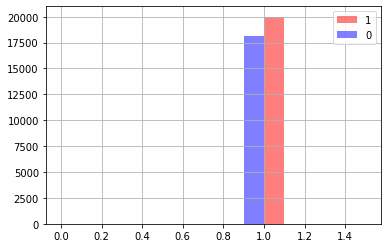

In [ ]:
PlotHist('num_sentences')

In [ ]:
df['quote'].value_counts()

1    20000
0    18109
Name: quote, dtype: int64

### Sentiments

Keep text with neutral or positive sentiments.

In [ ]:
from textblob import TextBlob

In [ ]:
df['polarity_score'] = df['text'].apply(lambda x : TextBlob(x).sentiment.polarity)

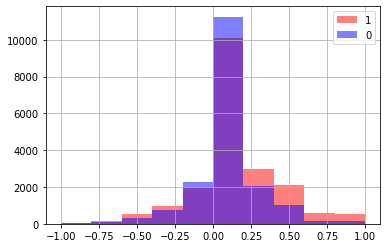

In [ ]:
PlotHist('polarity_score')

In [ ]:
def sentiment(x):
    if x < 0:
        return -1
    elif x == 0:
        return 0
    else:
        return 1

In [ ]:
df['polarity'] = df['polarity_score'].map(lambda x: sentiment(x))

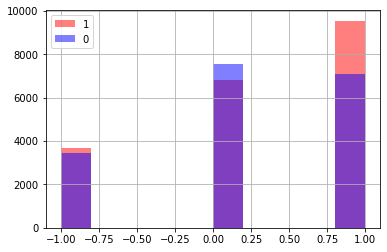

In [ ]:
PlotHist('polarity')

In [ ]:
df[df['polarity'] == 1].sample(5)

,text,quote,lower,punctuation,num_chars,words,num_words,num_sentences,polarity_score,polarity
10431,"It's the wonderment of water that makes it so appealing: thoughts of what's beneath the surface, or out there beyond a watery horizon.",1,"it's the wonderment of water that makes it so appealing: thoughts of what's beneath the surface, or out there beyond a watery horizon.",5,134,"[it's, the, wonderment, of, water, that, makes, it, so, appealing:, thoughts, of, what's, beneath, the, surface,, or, out, there, beyond, a, watery, horizon.]",23,1,0.50,1
14564,"Agape Love is a Revolution, it has no Strings attached",1,"agape love is a revolution, it has no strings attached",1,54,"[agape, love, is, a, revolution,, it, has, no, strings, attached]",10,1,0.50,1
31403,Your calling is your natural area of concentration,1,your calling is your natural area of concentration,0,50,"[your, calling, is, your, natural, area, of, concentration]",8,1,0.10,1
7208,"Studies have shown that since women have had access to the pill and family planning measures, they have made huge gains in both wages and in careers that were dominated by men.",1,"studies have shown that since women have had access to the pill and family planning measures, they have made huge gains in both wages and in careers that were dominated by men.",2,176,"[studies, have, shown, that, since, women, have, had, access, to, the, pill, and, family, planning, measures,, they, have, made, huge, gains, in, both, wages, and, in, careers, that, were, dominat...",32,1,0.40,1
26438,I came to understand that happiness and vulnerability are often the same thing.,1,i came to understand that happiness and vulnerability are often the same thing.,1,79,"[i, came, to, understand, that, happiness, and, vulnerability, are, often, the, same, thing.]",13,1,0.35,1


In [ ]:
df[df['polarity'] == 0].sample(5)

,text,quote,lower,punctuation,num_chars,words,num_words,num_sentences,polarity_score,polarity
20628,Awareness is not a prerequisite for change.,1,awareness is not a prerequisite for change.,1,43,"[awareness, is, not, a, prerequisite, for, change.]",7,1,0.0,0
71531,Thermal conductivity and temperature resistance:,0,thermal conductivity and temperature resistance:,1,48,"[thermal, conductivity, and, temperature, resistance:]",5,1,0.0,0
75982,I looked away.,0,i looked away.,1,14,"[i, looked, away.]",3,1,0.0,0
22632,Giving birth was easier than having a tattoo.,1,giving birth was easier than having a tattoo.,1,45,"[giving, birth, was, easier, than, having, a, tattoo.]",8,1,0.0,0
44318,But this time she was nervous: she was open.,0,but this time she was nervous: she was open.,2,44,"[but, this, time, she, was, nervous:, she, was, open.]",9,1,0.0,0


In [ ]:
df[df['polarity'] == -1].sample(5)

,text,quote,lower,punctuation,num_chars,words,num_words,num_sentences,polarity_score,polarity
14968,"In parenting, as in judging, the days are long, but the years are short.",1,"in parenting, as in judging, the days are long, but the years are short.",4,72,"[in, parenting,, as, in, judging,, the, days, are, long,, but, the, years, are, short.]",14,1,-0.025000,-1
45087,It forced us to fix the responsibility for the position in which all medical commentators had been placed.,0,it forced us to fix the responsibility for the position in which all medical commentators had been placed.,1,106,"[it, forced, us, to, fix, the, responsibility, for, the, position, in, which, all, medical, commentators, had, been, placed.]",18,1,-0.150000,-1
72948,"This question might be settled by comparing the measurement of the actual circumference with the dimensions noted, presumably in Brumidi's hand, above the various sections of his long preparatory ...",0,"this question might be settled by comparing the measurement of the actual circumference with the dimensions noted, presumably in brumidi's hand, above the various sections of his long preparatory ...",5,225,"[this, question, might, be, settled, by, comparing, the, measurement, of, the, actual, circumference, with, the, dimensions, noted,, presumably, in, brumidi's, hand,, above, the, various, sections...",34,1,-0.012500,-1
9260,"As a human rights activist it is concerning to me that those committing atrocities against vulnerable people view these atrocities as 'progress', and assert with pride and conviction that they are...",1,"as a human rights activist it is concerning to me that those committing atrocities against vulnerable people view these atrocities as 'progress', and assert with pride and conviction that they are...",9,247,"[as, a, human, rights, activist, it, is, concerning, to, me, that, those, committing, atrocities, against, vulnerable, people, view, these, atrocities, as, 'progress',, and, assert, with, pride, a...",39,1,-0.250000,-1
11707,If something cames out from your mind it doesn't matter is it in the morning so early or it's too late for example it's nigh or you are outside with friends spend few minutes and write this down y...,1,if something cames out from your mind it doesn't matter is it in the morning so early or it's too late for example it's nigh or you are outside with friends spend few minutes and write this down y...,4,232,"[if, something, cames, out, from, your, mind, it, doesn't, matter, is, it, in, the, morning, so, early, or, it's, too, late, for, example, it's, nigh, or, you, are, outside, with, friends, spend, ...",43,1,-0.111111,-1


In [ ]:
df = df[df['polarity'] >= 0]
df.sample(5)

,text,quote,lower,punctuation,num_chars,words,num_words,num_sentences,polarity_score,polarity
65479,The concern they felt for me was such as I shall never forget and for which I will always be grateful.,0,the concern they felt for me was such as i shall never forget and for which i will always be grateful.,1,102,"[the, concern, they, felt, for, me, was, such, as, i, shall, never, forget, and, for, which, i, will, always, be, grateful.]",21,1,0.000000,0
26577,Conquest is made from the ashes of one's enemies.,1,conquest is made from the ashes of one's enemies.,2,49,"[conquest, is, made, from, the, ashes, of, one's, enemies.]",9,1,0.000000,0
73621,"It was payday for Highlands, and he was packing a lot of money back into the oil fields.",0,"it was payday for highlands, and he was packing a lot of money back into the oil fields.",2,88,"[it, was, payday, for, highlands,, and, he, was, packing, a, lot, of, money, back, into, the, oil, fields.]",18,1,0.000000,0
465,"Only those few who are able to surpass their fear of death completely can fully experience the highest forms of life; not the mundane life of the mortal, but the godly life of the resurrected.",1,"only those few who are able to surpass their fear of death completely can fully experience the highest forms of life; not the mundane life of the mortal, but the godly life of the resurrected.",3,192,"[only, those, few, who, are, able, to, surpass, their, fear, of, death, completely, can, fully, experience, the, highest, forms, of, life;, not, the, mundane, life, of, the, mortal,, but, the, god...",35,1,0.046667,1
54062,"Sheeting cast from this material reportedly weighs only one-third as much as glass, is impervious to all kinds of weather, and will not yellow.",0,"sheeting cast from this material reportedly weighs only one-third as much as glass, is impervious to all kinds of weather, and will not yellow.",4,143,"[sheeting, cast, from, this, material, reportedly, weighs, only, one-third, as, much, as, glass,, is, impervious, to, all, kinds, of, weather,, and, will, not, yellow.]",24,1,0.066667,1


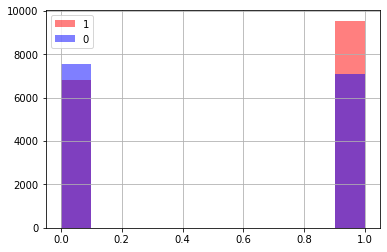

In [ ]:
PlotHist('polarity')

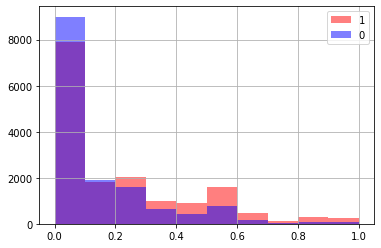

In [ ]:
PlotHist('polarity_score')

In [ ]:
df['quote'].value_counts()

1    16341
0    14644
Name: quote, dtype: int64

### Language

Keep only English text.

In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
df['lang'] = df['text'].map(lambda x: translator.detect(x).lang)
df[df['lang'] != 'en']

,text,quote,lower,punctuation,num_chars,words,num_words,num_sentences,polarity_score,polarity,lang
89,Unaanzaje ku judge kwanini nipo hivi wakati kila mtu ana uniqueness pengine nzuri au mbaya,1,unaanzaje ku judge kwanini nipo hivi wakati kila mtu ana uniqueness pengine nzuri au mbaya,0,90,"[unaanzaje, ku, judge, kwanini, nipo, hivi, wakati, kila, mtu, ana, uniqueness, pengine, nzuri, au, mbaya]",15,1,0.0,0,sw
1335,"pada akhirnya yang pergi akan kembali,entah pada pelukan, atau pada masing-masing kenangan",1,"pada akhirnya yang pergi akan kembali,entah pada pelukan, atau pada masing-masing kenangan",3,90,"[pada, akhirnya, yang, pergi, akan, kembali,entah, pada, pelukan,, atau, pada, masing-masing, kenangan]",12,1,0.0,0,"[id, ms]"
2519,"Vorrei dirgli che possiamo venirci incontro, trovarci a metà strada, far scontrare i suoi timori con le mie disfunzionalità, intrecciare la mia instabilità con la sua, cercare di trovare un equili...",1,"vorrei dirgli che possiamo venirci incontro, trovarci a metà strada, far scontrare i suoi timori con le mie disfunzionalità, intrecciare la mia instabilità con la sua, cercare di trovare un equili...",5,214,"[vorrei, dirgli, che, possiamo, venirci, incontro,, trovarci, a, metà, strada,, far, scontrare, i, suoi, timori, con, le, mie, disfunzionalità,, intrecciare, la, mia, instabilità, con, la, sua,, c...",33,1,0.1,1,it
2741,No one provokes me with impunity (nemo me impune lacessit),1,no one provokes me with impunity (nemo me impune lacessit),2,58,"[no, one, provokes, me, with, impunity, (nemo, me, impune, lacessit)]",10,1,0.0,0,"[en, la]"
4074,"ME SIENTO MAL POR TI VIEJO AMIGO, PERO AL FINAL DEL DIA FUE MEJOR QUE TE FUERAS.",1,"me siento mal por ti viejo amigo, pero al final del dia fue mejor que te fueras.",2,80,"[me, siento, mal, por, ti, viejo, amigo,, pero, al, final, del, dia, fue, mejor, que, te, fueras.]",17,1,0.0,0,es
...,...,...,...,...,...,...,...,...,...,...,...
74016,On Stalin:,0,on stalin:,1,10,"[on, stalin:]",2,1,0.0,0,"[fi, en]"
74080,"For each i, let Af.",0,"for each i, let af.",2,19,"[for, each, i,, let, af.]",5,1,0.0,0,"[da, en]"
74184,Dutton.,0,dutton.,1,7,[dutton.],1,1,0.0,0,"[fi, en]"
77395,Now Af Af so Af.,0,now af af so af.,1,16,"[now, af, af, so, af.]",5,1,0.0,0,da


In [ ]:
df = df[df['lang'] == 'en']
df.sample(5)

,text,quote,lower,punctuation,num_chars,words,num_words,num_sentences,polarity_score,polarity,lang
50295,Why the teacher should study the individual pupil,0,why the teacher should study the individual pupil,0,49,"[why, the, teacher, should, study, the, individual, pupil]",8,1,0.000,0,en
19099,So the being grows rings,1,so the being grows rings,0,24,"[so, the, being, grows, rings]",5,1,0.000,0,en
42982,"The middle section of the program was made up of short numbers, naturally enough of unequal merit, but all of them pretty good at that.",0,"the middle section of the program was made up of short numbers, naturally enough of unequal merit, but all of them pretty good at that.",3,135,"[the, middle, section, of, the, program, was, made, up, of, short, numbers,, naturally, enough, of, unequal, merit,, but, all, of, them, pretty, good, at, that.]",25,1,0.190,1,en
6692,"Life's true value and meaning can only be known if we speak for the truth, not for our advocacy, but for the truth itself.",1,"life's true value and meaning can only be known if we speak for the truth, not for our advocacy, but for the truth itself.",4,122,"[life's, true, value, and, meaning, can, only, be, known, if, we, speak, for, the, truth,, not, for, our, advocacy,, but, for, the, truth, itself.]",24,1,0.175,1,en
32334,No blade can puncture the human heart like the well-chosen words of a spiteful son.,1,no blade can puncture the human heart like the well-chosen words of a spiteful son.,2,83,"[no, blade, can, puncture, the, human, heart, like, the, well-chosen, words, of, a, spiteful, son.]",15,1,0.000,0,en


In [ ]:
df['quote'].value_counts()

1    16300
0    14597
Name: quote, dtype: int64

### Profanity

Keep text with profanity score of less than 0.80.

In [ ]:
from profanity_check import predict_prob as profanity_predict_prob

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk.

In [ ]:
df['profanity_prob'] = df['text'].map(lambda x: profanity_predict_prob([x])[0])
df.sample(5)

,text,quote,lower,punctuation,num_chars,words,num_words,num_sentences,polarity_score,polarity,lang,profanity_prob
50796,"Why, I can get them knocked off for half that much "".",0,"why, i can get them knocked off for half that much "".",3,53,"[why,, i, can, get, them, knocked, off, for, half, that, much, "".]",12,1,0.016667,1,en,0.205392
42165,"Roberts careened backward, his back arched, fought for balance and, failing, stumbled against the newel post at the foot of the stairs.",0,"roberts careened backward, his back arched, fought for balance and, failing, stumbled against the newel post at the foot of the stairs.",5,135,"[roberts, careened, backward,, his, back, arched,, fought, for, balance, and,, failing,, stumbled, against, the, newel, post, at, the, foot, of, the, stairs.]",22,1,0.000000,0,en,0.039008
58151,"If our SAC bombers were, today, capable of surviving a surprise missile attack and because of infinite dispersion or long endurance had the capability to strike at Russia again, and again, and aga...",0,"if our sac bombers were, today, capable of surviving a surprise missile attack and because of infinite dispersion or long endurance had the capability to strike at russia again, and again, and aga...",6,265,"[if, our, sac, bombers, were,, today,, capable, of, surviving, a, surprise, missile, attack, and, because, of, infinite, dispersion, or, long, endurance, had, the, capability, to, strike, at, russ...",41,1,0.016667,1,en,0.033789
67906,"Time to go, I supposed.",0,"time to go, i supposed.",2,23,"[time, to, go,, i, supposed.]",5,1,0.000000,0,en,0.015436
59216,it can be changed;;,0,it can be changed;;,2,19,"[it, can, be, changed;;]",4,1,0.000000,0,en,0.018335


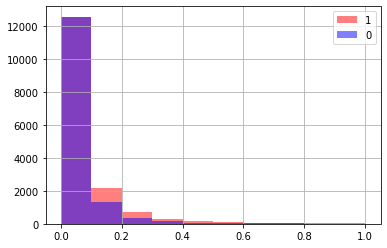

In [ ]:
PlotHist('profanity_prob')

In [ ]:
MAX_PROFANITY = 0.80

In [ ]:
df[df['profanity_prob'] > MAX_PROFANITY]

,text,quote,lower,punctuation,num_chars,words,num_words,num_sentences,polarity_score,polarity,lang,profanity_prob
1138,"I think the devil will not have me damned, lest the oil that's in me should set hell on fire.",1,"i think the devil will not have me damned, lest the oil that's in me should set hell on fire.",3,93,"[i, think, the, devil, will, not, have, me, damned,, lest, the, oil, that's, in, me, should, set, hell, on, fire.]",20,1,0.00,0,en,0.850197
1242,hypocrisy,1,hypocrisy,0,9,[hypocrisy],1,1,0.00,0,en,0.812980
1967,What a beautiful day to go to hell,1,what a beautiful day to go to hell,0,34,"[what, a, beautiful, day, to, go, to, hell]",8,1,0.85,1,en,0.830637
1968,Space is so fucking awesome.,1,space is so fucking awesome.,1,28,"[space, is, so, fucking, awesome.]",5,1,1.00,1,en,0.999592
1997,Where's the pleasure in bein' the winner if the loser ain't alive to know they've lost?,1,where's the pleasure in bein' the winner if the loser ain't alive to know they've lost?,5,87,"[where's, the, pleasure, in, bein', the, winner, if, the, loser, ain't, alive, to, know, they've, lost?]",16,1,0.10,1,en,0.808375
...,...,...,...,...,...,...,...,...,...,...,...,...
73410,You're the kind of bastard who sneaks up on a man from behind and hits him with a club.,0,you're the kind of bastard who sneaks up on a man from behind and hits him with a club.,2,87,"[you're, the, kind, of, bastard, who, sneaks, up, on, a, man, from, behind, and, hits, him, with, a, club.]",19,1,0.10,1,en,0.868188
74006,"The youngsters in the boys' class had nicknamed Dick ""Bugs Bunny"" because his teeth protruded.",0,"the youngsters in the boys' class had nicknamed dick ""bugs bunny"" because his teeth protruded.",4,94,"[the, youngsters, in, the, boys', class, had, nicknamed, dick, ""bugs, bunny"", because, his, teeth, protruded.]",15,1,0.00,0,en,0.804375
79202,"Their work mirrors the mentality of the psychopath, rootless and irresponsible.",0,"their work mirrors the mentality of the psychopath, rootless and irresponsible.",2,79,"[their, work, mirrors, the, mentality, of, the, psychopath,, rootless, and, irresponsible.]",11,1,0.00,0,en,0.849186
79500,"Hell, she couldn't.",0,"hell, she couldn't.",3,19,"[hell,, she, couldn't.]",3,1,0.00,0,en,0.833703


In [ ]:
df = df[df['profanity_prob'] < MAX_PROFANITY]
df.sample(5)

,text,quote,lower,punctuation,num_chars,words,num_words,num_sentences,polarity_score,polarity,lang,profanity_prob
41381,"Waiting for what and for whom, only he could tell and would not.",0,"waiting for what and for whom, only he could tell and would not.",2,64,"[waiting, for, what, and, for, whom,, only, he, could, tell, and, would, not.]",13,1,0.0,0,en,0.125351
54876,A disposition to exert themselves for my benefit would perhaps be a motive with some of them to come into the scheme.,0,a disposition to exert themselves for my benefit would perhaps be a motive with some of them to come into the scheme.,1,117,"[a, disposition, to, exert, themselves, for, my, benefit, would, perhaps, be, a, motive, with, some, of, them, to, come, into, the, scheme.]",22,1,0.0,0,en,0.021750
46663,the Joseph Pennell Memorial Medal;;,0,the joseph pennell memorial medal;;,2,35,"[the, joseph, pennell, memorial, medal;;]",5,1,0.0,0,en,0.061029
11249,Any path is only a path and there is no affront to oneself or to others in dropping it if that is what your heart tells you.,1,any path is only a path and there is no affront to oneself or to others in dropping it if that is what your heart tells you.,1,127,"[any, path, is, only, a, path, and, there, is, no, affront, to, oneself, or, to, others, in, dropping, it, if, that, is, what, your, heart, tells, you.]",27,1,0.0,0,en,0.035529
47373,"( opposite page, bottom): White clay was used, rolled to 1/4"" ""thickness.",0,"( opposite page, bottom): white clay was used, rolled to 1/4"" ""thickness.",9,73,"[(, opposite, page,, bottom):, white, clay, was, used,, rolled, to, 1/4"", ""thickness.]",12,1,0.0,0,en,0.011734


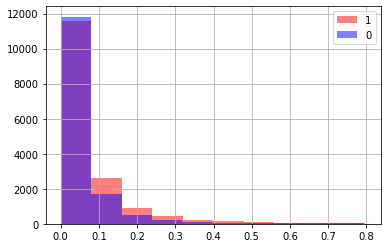

In [ ]:
PlotHist('profanity_prob')

In [ ]:
df['quote'].value_counts()

1    16197
0    14563
Name: quote, dtype: int64

## Generate Dataset

### Balance Dataset

Examine the resulting data and keep both quotations and non-quotations the same size.

In [ ]:
df['quote'].value_counts()

1    16197
0    14563
Name: quote, dtype: int64

In [ ]:
class_0 = df['quote'].value_counts()[0]
class_1 = df['quote'].value_counts()[1]

In [ ]:
if class_0 < class_1:
  df_class_0 = df[df['quote'] == 0]
  df_class_1 = df[df['quote'] == 1].sample(class_0, random_state=RANDOM_STATE)
else:
  df_class_0 = df[df['quote'] == 0].sample(class_1, random_state=RANDOM_STATE)
  df_class_1 = df[df['quote'] == 1]

In [ ]:
df = pd.concat([df_class_0, df_class_1])\
  .sample(frac=1, random_state=RANDOM_STATE)\
  .reset_index(drop=True)
df

,text,quote,lower,punctuation,num_chars,words,num_words,num_sentences,polarity_score,polarity,lang,profanity_prob
0,"The true tragedy in most people's lives is that they are far better than they imagine themselves to be and, as a result, end up being much less than they might be.",1,"the true tragedy in most people's lives is that they are far better than they imagine themselves to be and, as a result, end up being much less than they might be.",4,163,"[the, true, tragedy, in, most, people's, lives, is, that, they, are, far, better, than, they, imagine, themselves, to, be, and,, as, a, result,, end, up, being, much, less, than, they, might, be.]",32,1,0.256667,1,en,0.022431
1,"""I know when my reflexes are gone and I'm not going to be any 25th man on the ball club"".",0,"""i know when my reflexes are gone and i'm not going to be any 25th man on the ball club"".",4,89,"[""i, know, when, my, reflexes, are, gone, and, i'm, not, going, to, be, any, 25th, man, on, the, ball, club"".]",20,1,0.000000,0,en,0.162093
2,"Songs from China and Japan were reserved exclusively for Miss Mao, who is a native of China, and those of the British Isles were sung by Mr. Fuller, who is English by birth.",0,"songs from china and japan were reserved exclusively for miss mao, who is a native of china, and those of the british isles were sung by mr. fuller, who is english by birth.",5,173,"[songs, from, china, and, japan, were, reserved, exclusively, for, miss, mao,, who, is, a, native, of, china,, and, those, of, the, british, isles, were, sung, by, mr., fuller,, who, is, english, ...",33,1,0.000000,0,en,0.018486
3,Through most of 1787 operations on both sides had been lackadaisical;;,0,through most of 1787 operations on both sides had been lackadaisical;;,2,70,"[through, most, of, 1787, operations, on, both, sides, had, been, lackadaisical;;]",11,1,0.500000,1,en,0.008171
4,... and all we knew about her that we didn't know the night before was that she had eyes like pansies and skin like the moon.,1,... and all we knew about her that we didn't know the night before was that she had eyes like pansies and skin like the moon.,5,125,"[..., and, all, we, knew, about, her, that, we, didn't, know, the, night, before, was, that, she, had, eyes, like, pansies, and, skin, like, the, moon.]",26,1,0.000000,0,en,0.123245
...,...,...,...,...,...,...,...,...,...,...,...,...
29121,When tire size is measured in this manner a constant of 168 is used in the formula.,0,when tire size is measured in this manner a constant of 168 is used in the formula.,1,83,"[when, tire, size, is, measured, in, this, manner, a, constant, of, 168, is, used, in, the, formula.]",17,1,0.000000,0,en,0.013893
29122,Those who aim at great deeds must also suffer greatly.,1,those who aim at great deeds must also suffer greatly.,1,54,"[those, who, aim, at, great, deeds, must, also, suffer, greatly.]",10,1,0.800000,1,en,0.089190
29123,Every first is a loss.,1,every first is a loss.,1,22,"[every, first, is, a, loss.]",5,1,0.250000,1,en,0.015537
29124,"No matter how earnest is our quest for guaranteed peace, we must maintain a high degree of military effectiveness at the same time we are engaged in negotiating the issue of arms reduction.",0,"no matter how earnest is our quest for guaranteed peace, we must maintain a high degree of military effectiveness at the same time we are engaged in negotiating the issue of arms reduction.",2,189,"[no, matter, how, earnest, is, our, quest, for, guaranteed, peace,, we, must, maintain, a, high, degree, of, military, effectiveness, at, the, same, time, we, are, engaged, in, negotiating, the, i...",33,1,0.020000,1,en,0.018317


In [ ]:
df['quote'].value_counts()

1    14563
0    14563
Name: quote, dtype: int64

### Save Dataset

Save resulting data set for download.

In [ ]:
df.to_csv('quotes-prepared.csv')

In [ ]:
from google.colab import files
files.download('quotes-prepared.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Explore Data

### Word Clouds

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
def plot_wordcloud(quote):
  comment_words = ''

  for val in df[df['quote'] == quote]['lower']:
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 800, height = 800,
          background_color ='white',
          stopwords = stopwords,
          min_font_size = 10).generate(comment_words)

  # plot the WordCloud image					
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  plt.show()

Visualize normal texts in word cloud.

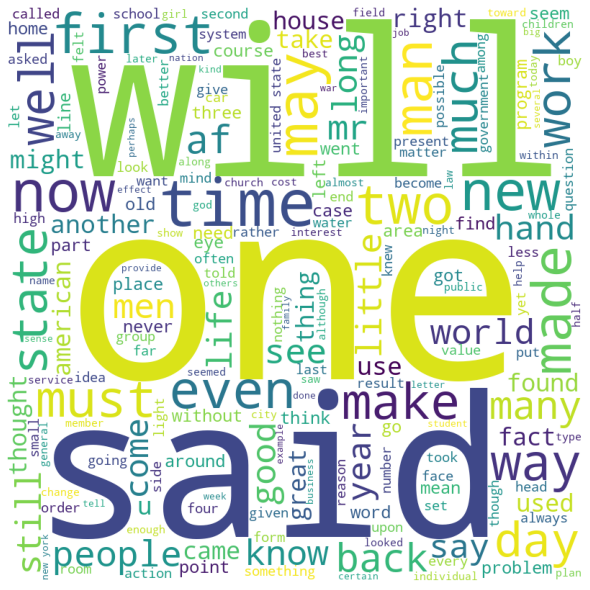

In [ ]:
plot_wordcloud(quote=0)

Visualize quotations in word cloud.

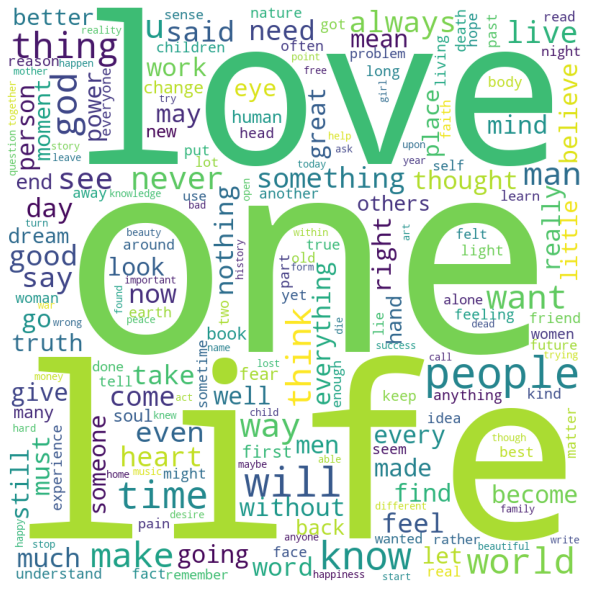

In [ ]:
plot_wordcloud(quote=1)

### Bar Charts

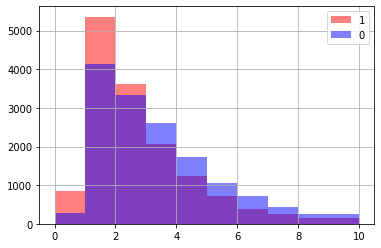

In [ ]:
PlotHist('punctuation')

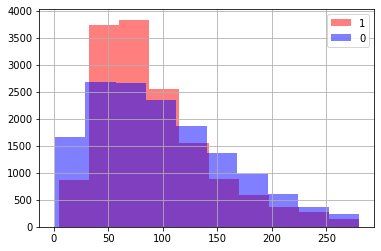

In [ ]:
PlotHist('num_chars')

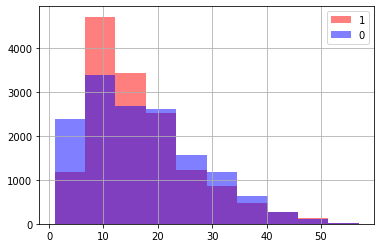

In [ ]:
PlotHist('num_words')

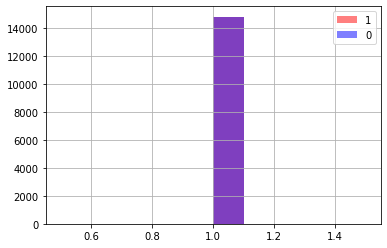

In [ ]:
PlotHist('num_sentences')

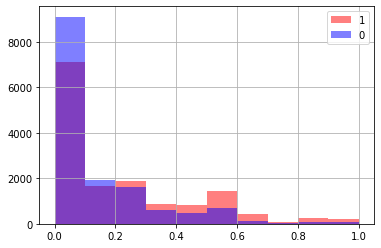

In [ ]:
PlotHist('polarity_score')

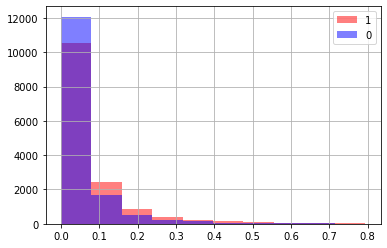

In [ ]:
PlotHist('profanity_prob')